                             
                             Who Is Loyal Customer????
                             
 
 hello guys in this notebook i am going to explain how to use **Stractural Modeling Equasion(SME)** to explain how complex concepts like 

 Loyality of our Customers . the approch is we need to first identify those **measured attributes** that help explain loyality .


in our case we have 7 attributes :-

price

quality

value

satisfaction

share_of_voice

competitive_density

onvenience


now we need to come up with formulas for our loyality which are my **latent variable** namely:-


1. **Emotional loyality**

2. **Transactional_loyalty**


Note

Structural Equation Modeling applies mostly as a confirmation and testing method so we need to come up with the formula ourselves.

then for implimenting SME we can u se tools in spss,R and python i chose python library called **semopy**.

In [13]:
import semopy as sm
from semopy import Model
import numpy as np 
import pandas as pd

In [4]:

# Set random seed for reproducibility
np.random.seed(42)

# Generate measured attributes
price = np.random.normal(0, 1, 1000)
quality = np.random.normal(0, 1, 1000)
value = np.random.normal(0, 1, 1000)
satisfaction= np.random.normal(0, 1, 1000)
share_of_voice = np.random.normal(0, 1, 1000)
competitive_density = np.random.normal(0, 1, 1000)
convenience = np.random.normal(0, 1, 1000)

# # Define the latent variables formulas
#  + np.random.normal(0, 1, 1000)
#  + np.random.normal(0, 1, 1000)

# Create the dataset
df = np.column_stack((price, quality, value, satisfaction, share_of_voice, competitive_density, convenience))


In [5]:
# Convert NumPy array to Pandas DataFrame
df = pd.DataFrame(df, columns=['Price', 'Quality', 'Value', 'Satisfaction', 'Share_of_Voice', 'Competitive_Density', 'Convenience'])

In [6]:
df.head(3)

,Price,Quality,Value,Satisfaction,Share_of_Voice,Competitive_Density,Convenience
0,0.496714,1.399355,-0.675178,-1.907808,-0.863494,-0.423760,-1.114081
1,-0.138264,0.924634,-0.144519,-0.860385,-0.031203,-0.453414,-0.630931
2,0.647689,0.059630,-0.792420,-0.413606,0.018017,-1.795643,-0.942060


In [7]:
# Remove rows with negative and zero values
df_filtered = df[(df >= 0) & (df != 0)].dropna()

In [14]:
mod = """
# measurement model
emotional_loyalty =~ Satisfaction + Convenience +  Value
transactional_loyalty =~ Price + Share_of_Voice + Competitive_Density 
    """

In [15]:
model = Model(mod)
model.fit(df_filtered, obj="MLW", solver="SLSQP")

SolverResult(fun=71.58060888330692, success=True, n_it=55, x=array([ 0.28443406,  0.05209482, -2.84387671,  1.18262328,  0.02412843,
        0.03565538,  0.65379804,  0.        ,  0.8610119 ,  0.02631526,
        0.        , -0.23365246,  0.09200954]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [16]:
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Satisfaction,~,emotional_loyalty,1.000000,-,-,-
1,Convenience,~,emotional_loyalty,0.284434,0.408402,0.696456,0.486143
2,Value,~,emotional_loyalty,0.052095,0.075932,0.68607,0.492669
3,Price,~,transactional_loyalty,1.000000,-,-,-
4,Share_of_Voice,~,transactional_loyalty,-2.843877,0.812338,-3.500853,0.000464
5,Competitive_Density,~,transactional_loyalty,1.182623,0.406937,2.906159,0.003659
6,emotional_loyalty,~~,emotional_loyalty,0.000000,0.832946,0.0,1.0
7,emotional_loyalty,~~,transactional_loyalty,-0.233652,0.176381,-1.324705,0.185269
8,transactional_loyalty,~~,transactional_loyalty,0.092010,0.077752,1.183367,0.236664
9,Value,~~,Value,0.024128,0.015427,1.564072,0.117801


In [17]:
sm.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,8,15,357.903044,0.0,381.74622,0.045926,0.062458,-0.757891,0.062458,-0.788889,3.306731,-117.161218,-122.238525,71.580609


In [18]:
g = sm.semplot(model, "model.png")

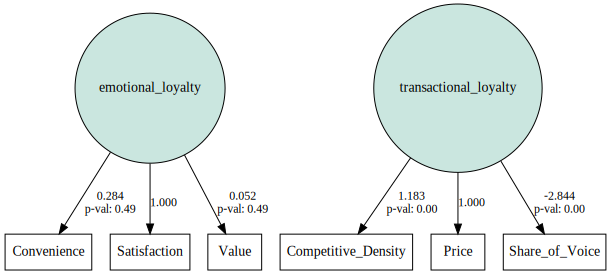

In [19]:
g